# Multi-Variate Linear Regression

# 68_Adnan Shaikh

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
#Lambda function to create linearly dependent feature using linearly independent features 
dep_feat = lambda X: np.sum([np.random.uniform(10,10)+np.random.randint(0,2)*np.random.randint(-10,10)*np.random.rand()*x for x in X],axis=0)

In [11]:
#Initializing constants N <- No. of records, NO_INDEP <- No. of Independent Features, NO_DEP <- No. of Dependent Features
N = 1000
NO_INDEP = 10
NO_DEP = 4

In [12]:
#Initializing Independent Features X and Dependent Features Y
X = np.array([np.random.uniform(low=-2500,high=4001,size=N) for _ in range(NO_INDEP)])
Y = np.transpose([dep_feat(X) for _ in range(NO_DEP)])
X = np.transpose(X)
print(f"Shape of Independent Array: {X.shape},Shape of Dependent Array: {Y.shape}")
print(f"Sample of X data from each features:\n {X[:10,:]}")
print(f"Sample of Y data from each features:\n {Y[:10,:]}")

Shape of Independent Array: (1000, 10),Shape of Dependent Array: (1000, 4)
Sample of X data from each features:
 [[ 3517.36411745  3242.55487782  1504.67607976  3226.63227622
   -920.1981244  -1707.33163588  3706.33546492  2932.22514714
   3569.83653402  -365.01638012]
 [ 2970.65588953  -398.40570039  2685.21420735  -755.71512461
   1410.56656655  2561.16992899  3298.43661622  3678.38940818
   -825.84615784  3853.50737534]
 [ 2264.11644431  1723.10709214  2575.55049952 -1545.96619944
  -1310.78850035  3785.76949599  3492.19283486 -1782.50668535
    724.47400094  1112.58514722]
 [ 1826.44220667 -2028.40216093  1547.78294526 -1125.21689097
   -518.83851474  -545.89148162 -1966.03802717  1491.70816542
   3274.73803414    62.60049293]
 [  684.06862355  -790.12721043  2459.11760112  3316.94509863
   3648.94615902  1570.81760048   103.78725663 -1978.66985567
   -564.87640845 -1221.29854422]
 [  875.10627978  2961.91361651  1300.35312827  -434.08739244
  -1097.70175763  -291.25786239 -2119.14

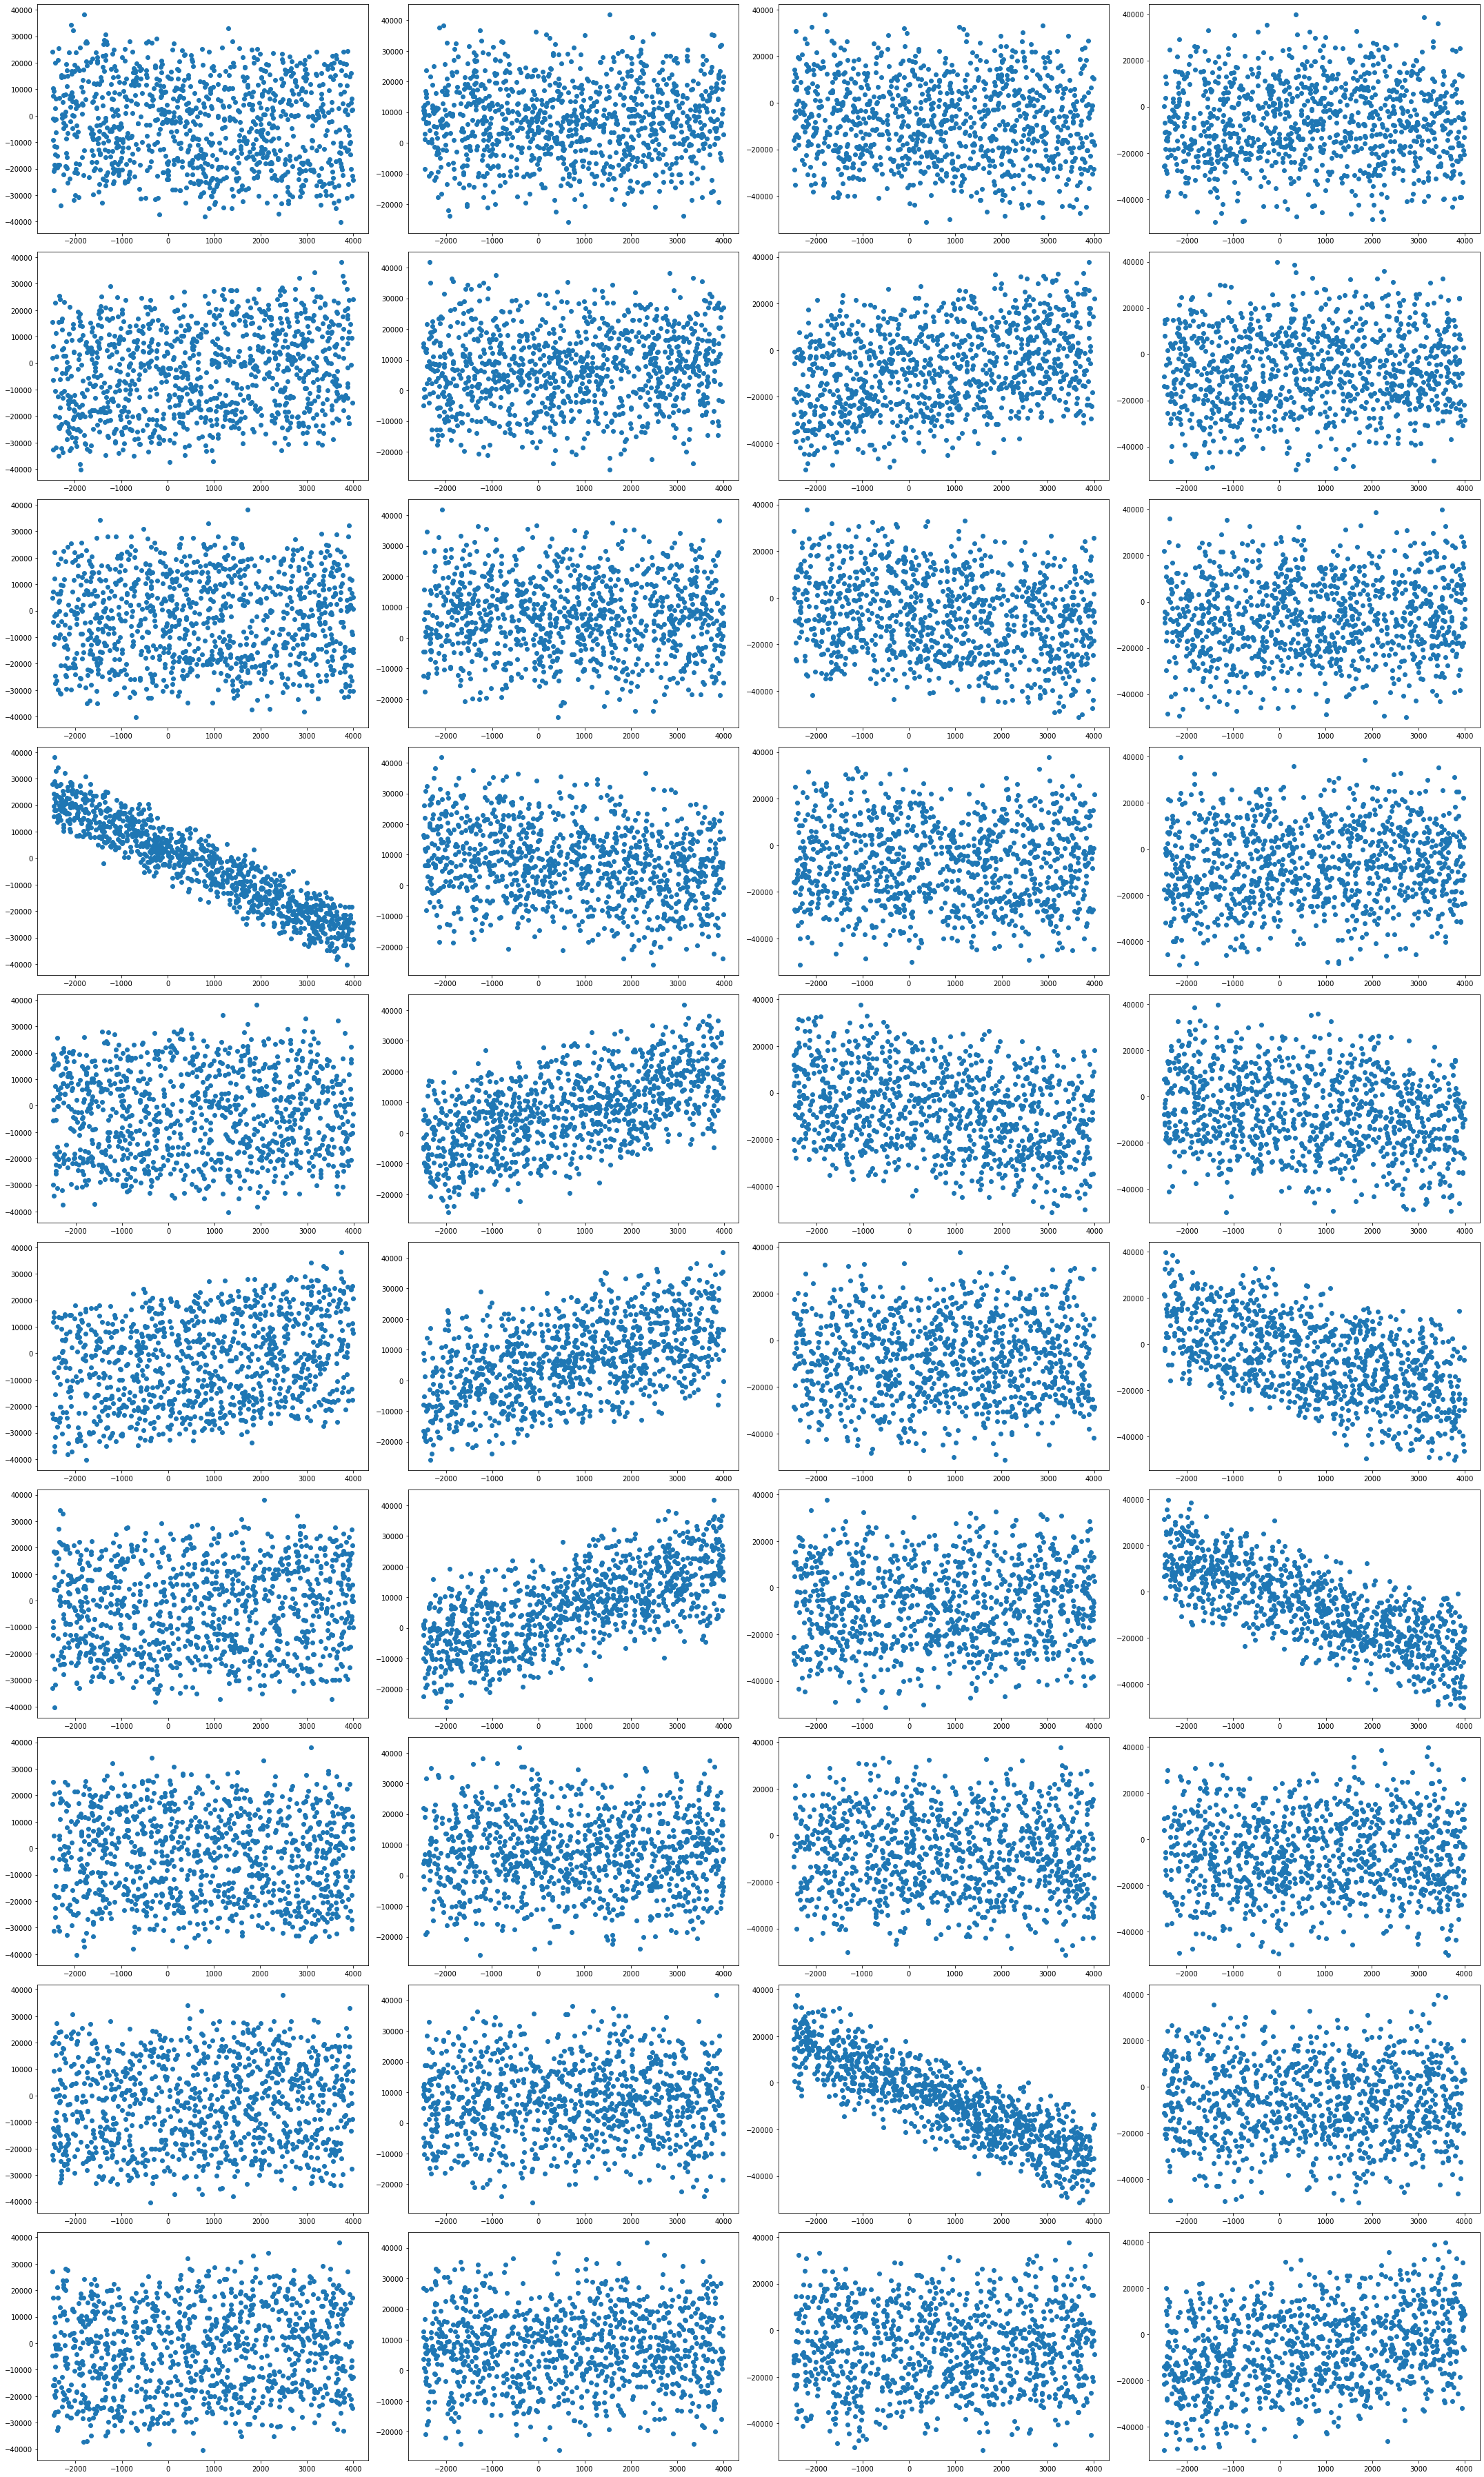

In [13]:
#Scatter plot between each dependent and independent variable
fig,axes = plt.subplots(NO_INDEP,NO_DEP,figsize=(30,50),tight_layout=True)
for i in range(NO_INDEP):
  for j in range(NO_DEP):
    axes[i,j].scatter(x=X[:,i],y=Y[:,j])

plt.show()

In [14]:
class MultiVariateRegression:

  def fit_model(self,X,Y):
    # Estimator Beta[i,j] calculation using matrices (Generalization of Multiple Linear Regression to Multivariate Regression)
    self.X,self.Y =  np.concatenate((np.ones((len(X),1)),X),axis=1),np.array(Y)
    self.X_transpose = self.X.T
    self.compose_mat = np.matmul(self.X_transpose,self.X) #Making square matrix that contains all the required summation of (XiXj)
    self.compose_inverse = np.linalg.inv(self.compose_mat)
    self.Beta = np.matmul(np.matmul(self.compose_inverse,self.X_transpose),Y) #Calculating Beta Estimators

  def predict(self,X):
    return np.matmul(np.concatenate(([1],X)),self.Beta) #Predicting Single Sample
  

  def predict_many(self,indep_feat):
    #Predicting Multiple Sample
    Y = []
    for x in indep_feat:
      Y.append(self.predict(x))
    return np.array(Y)

  def residual(self,Y,predicted_Y):
    #Error calculation using SSR and averaging errors of all the dependent variables
    sq_of_res = np.square(np.subtract(Y,predicted_Y)) 
    np.round(sq_of_res,2)
    ssr = np.sum(np.transpose(sq_of_res),axis=1)
    return np.round(np.average(ssr),2)


In [15]:
#Model Demonstration
mvr = MultiVariateRegression()
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=69,shuffle=True) # Splitting in training and test set
mvr.fit_model(X_train,Y_train)
Y_predicted = mvr.predict_many(X_test)
print(f"Residual: {mvr.residual(Y_test,Y_predicted)}") 
#Residual is zero since each dependent vector is a linear combination of independent vectors (refer block 2) it shows model working as required
#It can also be used to check relation between independent variables 

Residual: 0.0
